In [24]:
import argparse
from ensurepip import bootstrap
from gan.config import SmallModelConfig, DataExtendConfig
from gan.game.zelda import Zelda
from gan.game.mario import Mario
from gan.level_visualizer import MarioLevelVisualizer
from gan.trainer import Trainer
from gan.level_dataset_extend import prepare_dataset
import numpy as np
import torch
from torchvision.utils import make_grid
import torchvision.transforms as transforms

In [26]:
config = SmallModelConfig()
config.env_name = "mario"
config.env_version = 'v0'
game = Mario(config.env_name, config.env_version)

visualizer = MarioLevelVisualizer(game,'/root/mnt/pcg/GVGAI-GAN/gan/data/level/mario_v0')

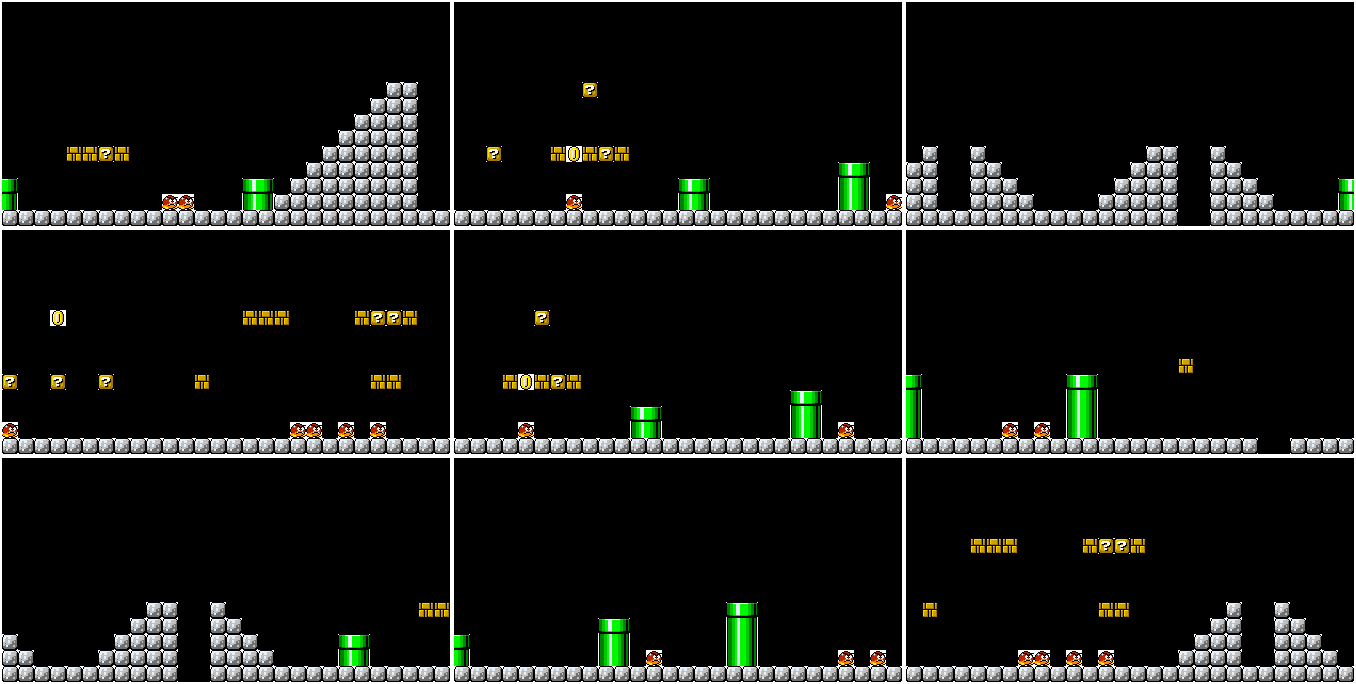

torch.Size([3, 684, 1356])

In [31]:
levels = game.get_original_levels('/root/mnt/pcg/GVGAI-GAN/gan/data/level/mario_v0/originals/')
# imgs = [visualizer.draw_level(levels[i]) for i in range(9)]
torch_imgs = [torch.tensor(np.array(visualizer.draw_level(lvl)).transpose(2,0,1)/255.0) for lvl in levels[:9]]
imgs = make_grid(torch_imgs,nrow=3,padding=0)
def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。"""
    img = transforms.functional.to_pil_image(img)
    display(img)
imshow(imgs)